In [3]:
import pandas as pd

file_path = '../data/raw/SMSSpamCollection'
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'], encoding='latin-1')

print("DataFrame Head:")
print(df.head())

print("\nDataFrame info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)


DataFrame Head:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

DataFrame Shape:
(5572, 2)


Distribution of 'label' (ham vs. spam):
label
ham     4825
spam     747
Name: count, dtype: int64


/var/folders/97/6vmy4w112szg9v0nq70hphs80000gn/T/ipykernel_874/1884956163.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


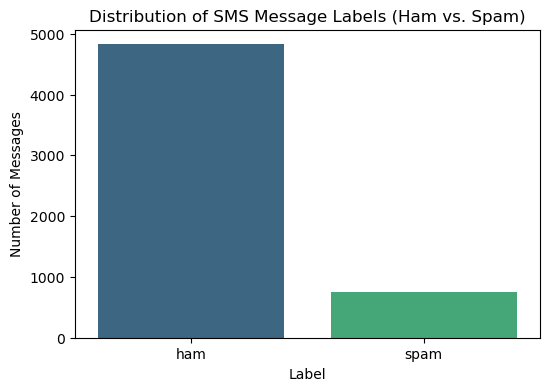


Sample 'ham' messages:
['You do got a shitload of diamonds though', 'Buzzzz! *grins* Did I buzz your ass? Buzz your chest ? Buzz your cock ? Where do you keep your phone ? Is the vibrator on ? Did you feel it shake ?', "Hello baby, did you get back to your mom's ? Are you setting up the computer now ? Filling your belly ? How goes it loverboy ? I miss you already ... *sighs*"]

Sample 'spam' messages:
['FreeMsg: Claim ur 250 SMS messages-Text OK to 84025 now!Use web2mobile 2 ur mates etc. Join Txt250.com for 1.50p/wk. T&C BOX139, LA32WU. 16 . Remove txtX or stop', 'Free Top ringtone -sub to weekly ringtone-get 1st week free-send SUBPOLY to 81618-?3 per week-stop sms-08718727870', "FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end"]


In [4]:
# Basic data exploration
# This step to understanding labels and missing values

import matplotlib.pyplot as plt
import seaborn as sns

print("Distribution of 'label' (ham vs. spam):")
print(df['label'].value_counts())

# Visualizing
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of SMS Message Labels (Ham vs. Spam)')
plt.xlabel('Label')
plt.ylabel('Number of Messages')
plt.show()

# Few samples of ham messages
print("\nSample 'ham' messages:")
print(df[df['label'] == 'ham']['message'].sample(3).tolist())

# Few samples of spam messages
print("\nSample 'spam' messages:")
print(df[df['label'] == 'spam']['message'].sample(3).tolist())


DataFrame Head with 'message_length':
  label                                            message  message_length
0   ham  Go until jurong point, crazy.. Available only ...             111
1   ham                      Ok lar... Joking wif u oni...              29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
3   ham  U dun say so early hor... U c already then say...              49
4   ham  Nah I don't think he goes to usf, he lives aro...              61


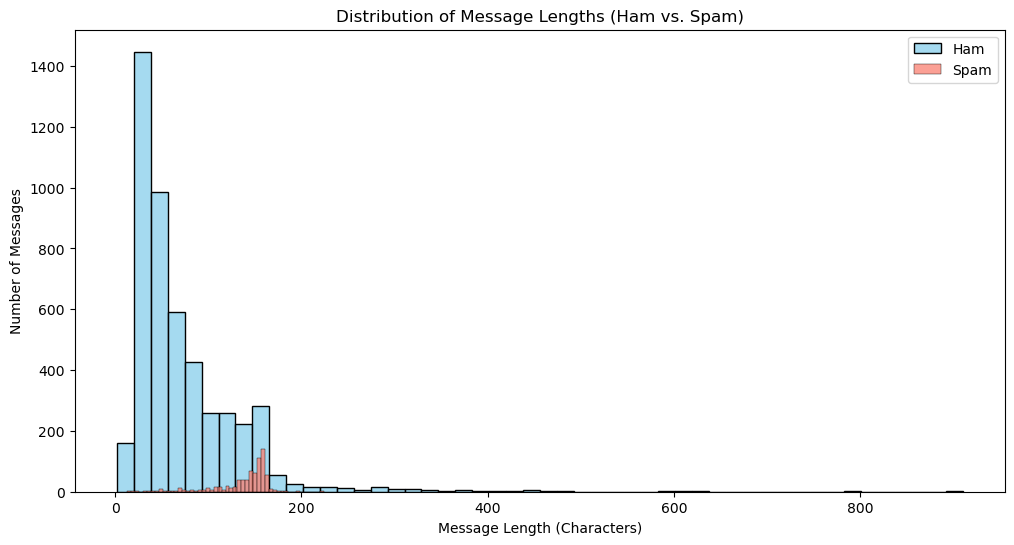

In [5]:
# Feature engineering
# Adding message length

df['message_length'] = df['message'].apply(len)

print("DataFrame Head with 'message_length':")
print(df.head())

plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'ham']['message_length'], bins=50, color='skyblue', label='Ham')
sns.histplot(df[df['label'] == 'spam']['message_length'], bins=50, color='salmon', label='Spam')
plt.title('Distribution of Message Lengths (Ham vs. Spam)')
plt.xlabel('Message Length (Characters)')
plt.ylabel('Number of Messages')
plt.legend()
plt.show()

In [13]:
# If you are working with NLTK for first time, I recommed downloading NLTK resources directly from seperate cells 
# Because there might be a chance of LookupError, AttributeError in output. you can fix it this way.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekwaduge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhishekwaduge/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Text preprocessing - cleaning message contents
# Lowercasing, removing punctuation, removing stopwards

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def text_process(text):
    """
    1. remove punctuation
    2. remove stopwards
    3. return list of clean words 
    """
    # 1. Removing punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # 2. Remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

print("Text preprocessing function defined.")

Text preprocessing function defined.


In [14]:
# Applying the preprocessing function
df['clean_message_tokens'] = df['message'].apply(text_process)

print("DataFrame Head with 'clean_message_tokens':")
print(df.head())

print("\nSample cleaned tokens for a spam message:")
spam_message_index = df[df['label'] == 'spam'].index[0]
print(df.loc[spam_message_index, 'message'])
print(df.loc[spam_message_index, 'clean_message_tokens'])


DataFrame Head with 'clean_message_tokens':
  label                                            message  message_length  \
0   ham  Go until jurong point, crazy.. Available only ...             111   
1   ham                      Ok lar... Joking wif u oni...              29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3   ham  U dun say so early hor... U c already then say...              49   
4   ham  Nah I don't think he goes to usf, he lives aro...              61   

                                clean_message_tokens  
0  [Go, jurong, point, crazy, Available, bugis, n...  
1                     [Ok, lar, Joking, wif, u, oni]  
2  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...  
3      [U, dun, say, early, hor, U, c, already, say]  
4  [Nah, dont, think, goes, usf, lives, around, t...  

Sample cleaned tokens for a spam message:
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std

In [16]:
# Text vectorization usinf TF-IDF
# I will use skit-learn's TfidfVectorizer for this process

from sklearn.feature_extraction.text import TfidfVectorizer

df['clean_message_string'] = df['clean_message_tokens'].apply(lambda x: ' '.join(x))

print("DataFrame Head with 'clean_message_string':")
print(df.head())

#Initializing TfidfVectorizer. keeping the limit to the top 5000 most frequent words to keep it manageable. 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['clean_message_string'])
y = df['label']

print("\nShape of TF-IDF matrix (X):", X.shape)
print("Type of TF-IDF matrix (X):", type(X))
print("\nFirst 5 features (words) learned by TF-IDF vectorizer:")
print(tfidf_vectorizer.get_feature_names_out()[:5])

DataFrame Head with 'clean_message_string':
  label                                            message  message_length  \
0   ham  Go until jurong point, crazy.. Available only ...             111   
1   ham                      Ok lar... Joking wif u oni...              29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3   ham  U dun say so early hor... U c already then say...              49   
4   ham  Nah I don't think he goes to usf, he lives aro...              61   

                                clean_message_tokens  \
0  [Go, jurong, point, crazy, Available, bugis, n...   
1                     [Ok, lar, Joking, wif, u, oni]   
2  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...   
3      [U, dun, say, early, hor, U, c, already, say]   
4  [Nah, dont, think, goes, usf, lives, around, t...   

                                clean_message_string  
0  Go jurong point crazy Available bugis n great ...  
1                            Ok lar Joki

In [17]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# printing the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# verifying the label distribution in training and testing sets
print("\nLabel distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nLabel distribution in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (4457, 5000)
Shape of X_test: (1115, 5000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)

Label distribution in y_train:
label
ham     0.865829
spam    0.134171
Name: proportion, dtype: float64

Label distribution in y_test:
label
ham     0.866368
spam    0.133632
Name: proportion, dtype: float64


In [19]:
# model-building - training a naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

print("Training the Naive Bayes classifier...")
nb_classifier.fit(X_train, y_train)
print("Model training complete!")

Training the Naive Bayes classifier...
Model training complete!


Making predictions on the test set...

Accuracy: 0.9704

Confusion Matrix:
[[966   0]
 [ 33 116]]


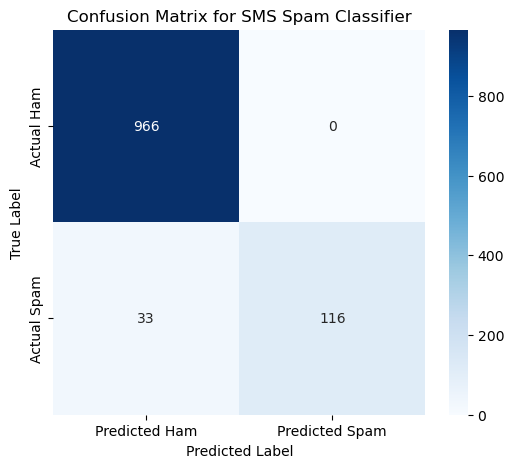


Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# make predictions on the test set
print("Making predictions on the test set...")
y_pred = nb_classifier.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix for SMS Spam Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [22]:
#saving the model
import joblib
import os

model_dir = '../models/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'nb_spam_classifier_model.joblib')
joblib.dump(nb_classifier, model_path)
print(f"Model saved to: {model_path}")

vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.joblib')
joblib.dump(tfidf_vectorizer, vectorizer_path)
print(f"Vectorizer saved to: {vectorizer_path}")

Model saved to: ../models/nb_spam_classifier_model.joblib
Vectorizer saved to: ../models/tfidf_vectorizer.joblib


In [24]:
#making predictions on new text

loaded_model = joblib.load(model_path)
loaded_vectorizer = joblib.load(vectorizer_path)
print("Model and vectorizer loaded successfully for testing.")

# define a new, unseen message
new_sms_ham = "Hey, let's catch up for coffee tomorrow at 10 AM. Are you free?"
new_sms_spam = "Congratulations! You've won a FREE iPhone! Click link to claim: www.freestuff.com/win"

# 1. preprocess the new message using our text_process function
cleaned_new_sms_ham = ' '.join(text_process(new_sms_ham))
cleaned_new_sms_spam = ' '.join(text_process(new_sms_spam))

print(f"\nCleaned Ham Message: '{cleaned_new_sms_ham}'")
print(f"Cleaned Spam Message: '{cleaned_new_sms_spam}'")

# 2. transform the cleaned message using the loaded TF-IDF vectorizer
transformed_new_sms_ham = loaded_vectorizer.transform([cleaned_new_sms_ham])
transformed_new_sms_spam = loaded_vectorizer.transform([cleaned_new_sms_spam])

# 3. make a prediction using the loaded model
prediction_ham = loaded_model.predict(transformed_new_sms_ham)
prediction_spam = loaded_model.predict(transformed_new_sms_spam)

print(f"\nPrediction for Ham Message ('{new_sms_ham}'): {prediction_ham[0]}")
print(f"Prediction for Spam Message ('{new_sms_spam}'): {prediction_spam[0]}")

Model and vectorizer loaded successfully for testing.

Cleaned Ham Message: 'Hey lets catch coffee tomorrow 10 free'
Cleaned Spam Message: 'Congratulations Youve FREE iPhone Click link claim wwwfreestuffcomwin'

Prediction for Ham Message ('Hey, let's catch up for coffee tomorrow at 10 AM. Are you free?'): ham
Prediction for Spam Message ('Congratulations! You've won a FREE iPhone! Click link to claim: www.freestuff.com/win'): spam
